#TAREA 1: PROBLEMAS DE REGRESIÓN
***
##Equipo de trabajo
###Samir Hassan - 2190041
###Gabriel Jeannot - 2185887
###Carlos Osorio - 2230894
###Luis Pareja - 2185833
###Diego Perea - 2185751

# Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

#Load Dataset

In [ ]:
#Print the total time taken to execute the code
#import time
#start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep=';' )
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ejemplo 1 (se debe normalizar): Supongamos que tenemos un conjunto de datos que representa la altura de personas en centímetros y su respectivo peso en kilogramos. Los valores mínimos y máximos son los siguientes:

Altura: min=150cm, max=190cm Peso: min=50kg, max=120kg Podemos observar que la diferencia entre el mínimo y el máximo de altura es mucho mayor que la diferencia entre el mínimo y el máximo de peso. Por lo tanto, si queremos aplicar un algoritmo de aprendizaje automático que tenga en cuenta ambas características de manera igual, es necesario normalizar los datos para que ambas características estén en la misma escala.

Ejemplo 2 (no se debe normalizar): Supongamos que tenemos un conjunto de datos que representa la temperatura ambiente en grados Celsius y la temperatura del agua en grados Celsius en diferentes momentos del día. Los valores mínimos y máximos son los siguientes:

Temperatura ambiente: min=15°C, max=35°C Temperatura del agua: min=18°C, max=22°C En este caso, las diferencias entre los mínimos y máximos son similares en ambas características, por lo que no es necesario normalizar los datos. Además, en este caso, normalizar los datos podría incluso eliminar información importante, ya que la diferencia entre la temperatura ambiente y la del agua es una característica importante que debe mantenerse en la escala original.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

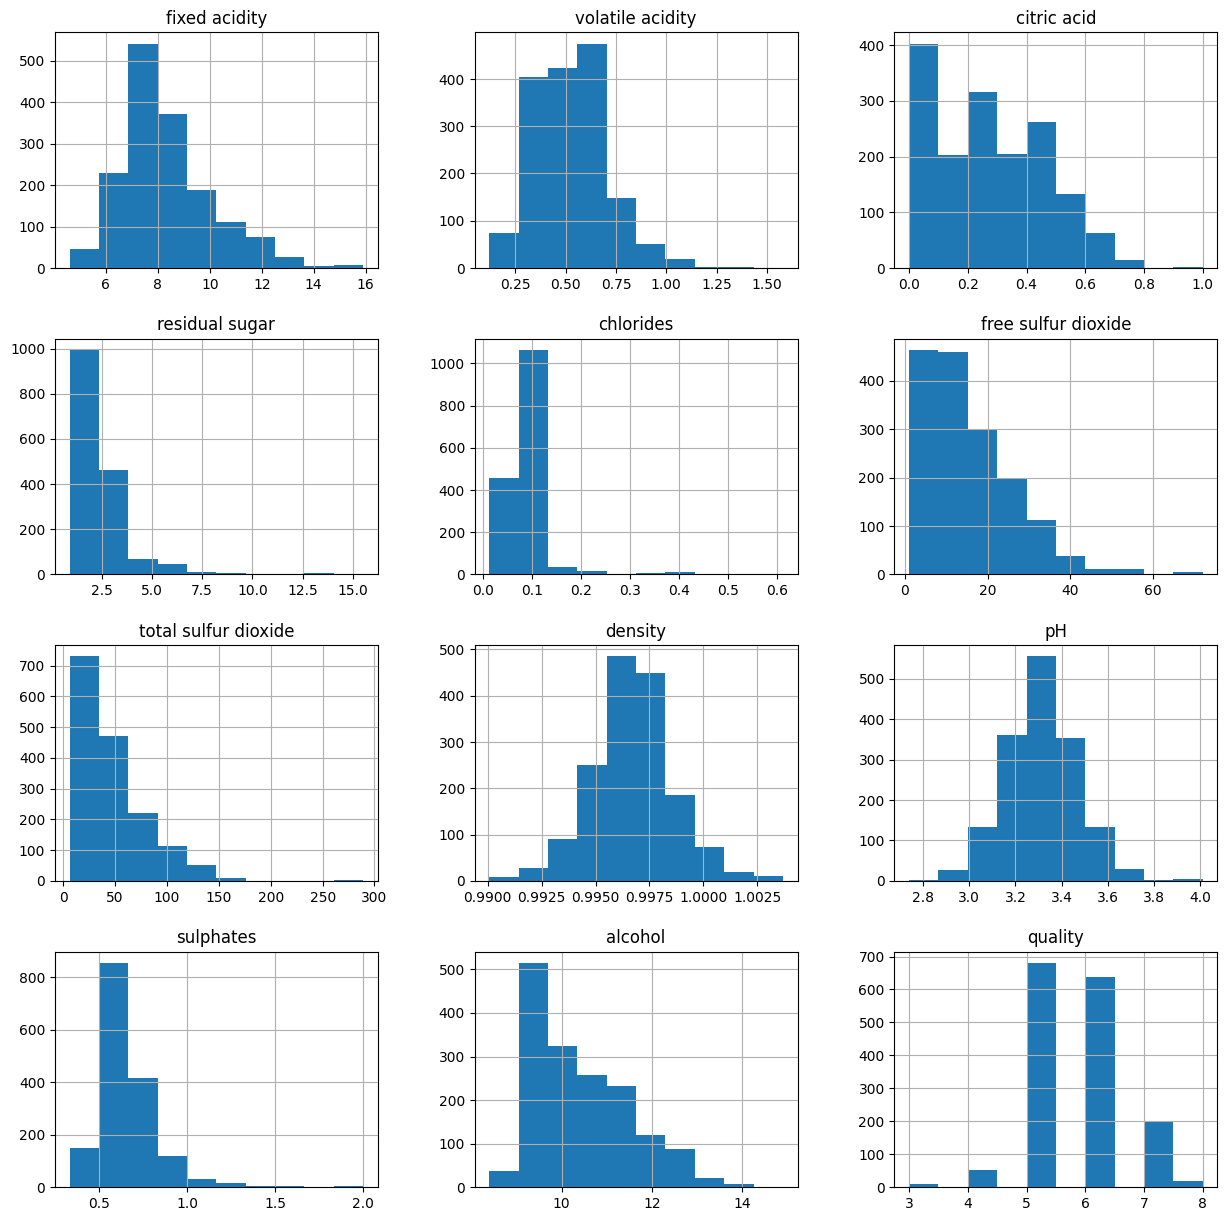

In [ ]:
dataset.hist(figsize=(15,15))

#Normalizar

In [ ]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [ ]:
max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


#Split the data into features and labels

In [ ]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
X.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385


In [ ]:
y.head(4)

0    0.4
1    0.4
2    0.4
3    0.6
Name: quality, dtype: float64

#Split the data into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape=(X_train.shape[1])
print(input_shape)

11


#Metodo 1

In [ ]:
# Método 1: Cálculo mediante la Ecuación Normal
# Agregar columna de unos para el término independiente
X1 = np.hstack((np.ones((X.shape[0], 1)), X))
# Calcular los parámetros de regresión
theta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
# Realizar la predicción
y_pred1 = X1 @ theta1
# Calcular los errores de entrenamiento y validación
train_error1 = mean_squared_error(y, y_pred1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train1 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test1 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_train_pred1 = X_train1 @ theta1
y_test_pred1 = X_test1 @ theta1
test_error1 = mean_squared_error(y_test, y_test_pred1)

In [ ]:
#Imprimir los resultados
print("Método 1: Cálculo mediante la Ecuación Normal")
print("Parámetros de regresión: ", theta1)
print("Coeficiente de regresión: ", pearsonr(y, y_pred1)[0])
print("R2_score (entrenamiento): ", r2_score(y, y_pred1))
print("MSE (entrenamiento): ", train_error1)
print("RMSE (entrenamiento): ", np.sqrt(train_error1))
print("MSE (validación): ", test_error1)
print("RMSE (validación): ", np.sqrt(test_error1))
print("")

Método 1: Cálculo mediante la Ecuación Normal
Parámetros de regresión:  [ 0.5425106   0.05647865 -0.31640836 -0.03651279  0.04768731 -0.22453217
  0.06193093 -0.18477521 -0.04870829 -0.1050679   0.30605569  0.35905701]
Coeficiente de regresión:  0.6004595765234227
R2_score (entrenamiento):  0.3605517030386879
MSE (entrenamiento):  0.016670686688856337
RMSE (entrenamiento):  0.129115013413841
MSE (validación):  0.015101719996609244
RMSE (validación):  0.12288905564210852



# Metodo 1 detallado

In [ ]:
#Metodo 1: calculo medinte un sistema de ecuaciones normales:

#Debido a la necesidad de ubicar el BIAS en la matriz de datos de entrada, se crea una matriz de unos con la misma cantidad de filas.
matrizUnos = np.ones((1599,1))

#Se crea la matriz de datos de entrada final, esto, al combinarse con la matriz de unos creada previamente.
matrizVariable_Entrada = np.hstack((matrizUnos, X))
#Se crea una matriz transpuesta de la matriz anterior, esto con el fin de tener una de las variable solicitadas en el calculo de la regresion lineal mediante el sistema de ecuaciones con minimos cuadrados.
matrizVariable_Entrada_Transpuesta = matrizVariable_Entrada.T

#Teniendo en cuenta que la ecuacion general de la normal es = [datos_entrada_transpuesta . datos_salida = datos_entrada_transpuesta . datos_entrada . Matriz_thethas]
# Se realiza la ecuación pseudoinversa, con el fin de encontrar theta_sub_n = [((datos_entrada_transpuesta . datos_entrada)**-1) . (datos_entrada_transpuesta) . (datos_salida)]
parte1 = np.dot(matrizVariable_Entrada_Transpuesta, matrizVariable_Entrada)
parte2 = np.dot(matrizVariable_Entrada_Transpuesta, y)
EcuacionFinal = np.dot(np.linalg.inv(parte1), parte2)


print(EcuacionFinal)

In [ ]:
#Una vez se han obtenido los valores de los coeficientes de la ecuación normal, se procede a evaluar el modelo de regresión con una fila del data set (en este caso la fila 3) que genera esta ecuación: 
prediccionM = 0.5425106 +  (0.05647865*(0.584071)) - (0.31640836*0.109589) - (0.03651279*0.560000) + (0.04768731*0.068493) - (0.22453217*0.105175) + (0.06193093*0.225352) - (0.18477521*0.190813) - (0.04870829*0.582232) - (0.1050679*0.330709) + (0.30605569*0.149701) + (0.35905701*0.215385)
#Se imprime el valor que se predice de la calidad del vino, a partir de las diferentes variables del data set.
print("Predicción de la calidad del vino :",prediccionM)
print("Valor real : 0.60000 ")

#Se analiza el error, el cual es la diferencia entre ambos valores
Error = 0.60000 - prediccionM
print("Error :", Error)

#Hallamos el coeficiente de determnación para medir la precisión del modelo (tomando en cuenta un solo valor comparado).
Coef_det = prediccionM / 0.60000
print("Coeficiente de determinación :", Coef_det)

### Cálculo de los errores relativos

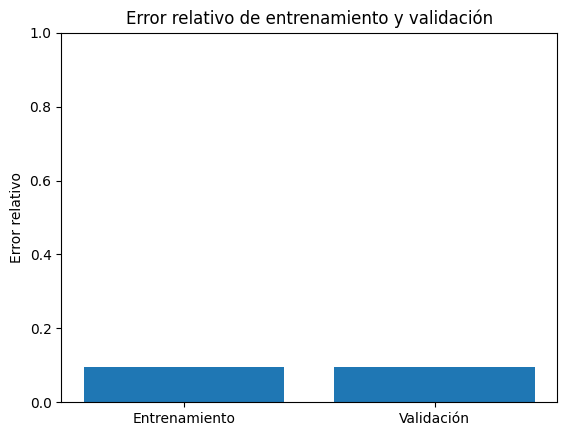

Error de entrenamiento: 0.0941153007989696
Error de validacion:  0.0941153007989696
Diferencia de train - validacion :   0.0


In [ ]:
# Calcular los errores relativos de entrenamiento y validación
relative_train_error_1 = abs(train_error1- test_error1 ) / train_error1
relative_test_error_1 = abs(train_error1 - test_error1 ) / train_error1

# Graficar los errores relativos
plt.bar(['Entrenamiento', 'Validación'], [relative_train_error_1 , relative_test_error_1])
plt.title('Error relativo de entrenamiento y validación')
plt.ylabel('Error relativo')
plt.ylim(0, 1)
plt.show()
print(f'Error de entrenamiento: {relative_train_error_1 }' )
print(f'Error de validacion:  {relative_test_error_1}')
print(f'Diferencia de train - validacion :   {relative_test_error_1- relative_train_error_1 }')

#Metodo 2 

Lasso se utiliza sobre los métodos de regresión para una predicción más precisa. Este modelo utiliza la contracción. La contracción es donde los valores de los datos se reducen hacia un punto central como la media. Este metodo de regularizacion es bueno cuando el modelo cuenta con pocos parámetros.

In [ ]:
# Método 2: Scikit-learn con regularización Lasso y Ridge
# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Realizar la regresión con regularización Lasso
lasso = Lasso(alpha=0.1)+
lasso.fit(X_train, y_train)
y_train_pred2a = lasso.predict(X_train)
y_test_pred2a = lasso.predict(X_test)
train_error2a = mean_squared_error(y_train, y_train_pred2a)
test_error2a = mean_squared_error(y_test, y_test_pred2a)

Si los pesos del modelo son grandes, el parametro alpha nos dice que tanto se van a penalizar estos coeficientes.
Coeficientes grandes = Overfitting

In [ ]:
print("Método 2a: Scikit-learn con regularización Lasso")
print("Parámetros de regresión: ", lasso.coef_)
print("Coeficiente de regresión: ", pearsonr(y_test, y_test_pred2a)[0])
print("R2_score (entrenamiento): ", lasso.score(X_train, y_train))
print("MSE (entrenamiento): ", train_error2a)
print("RMSE (entrenamiento): ", np.sqrt(train_error2a))
print("MSE (validación): ", test_error2a)
print("RMSE (validación): ", np.sqrt(test_error2a))
print("")

Método 2a: Scikit-learn con regularización Lasso
Parámetros de regresión:  [ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]
Coeficiente de regresión:  nan
R2_score (entrenamiento):  0.0
MSE (entrenamiento):  0.026841679600890327
RMSE (entrenamiento):  0.16383430532367246
MSE (validación):  0.023010157772057328
RMSE (validación):  0.1516909943670267



/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


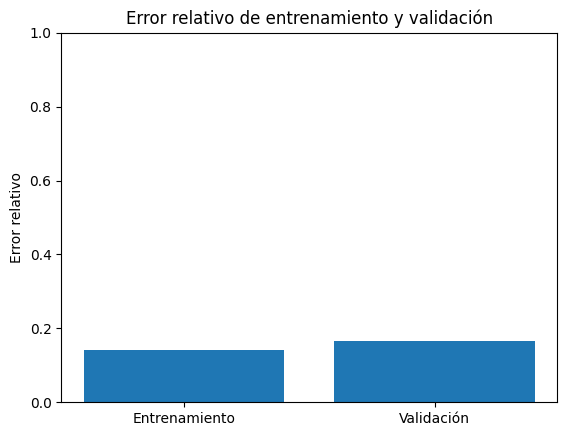

Error de entrenamiento: 0.14274523374855833
Error de validacion:  0.1665143658200317
Diferencia de train - validacion :   0.02376913207147338


In [ ]:


# Calcular los errores relativos de entrenamiento y validación
relative_train_error_a = abs(train_error2a - test_error2a) / train_error2a
relative_test_error_a = abs(train_error2a - test_error2a) / test_error2a

# Graficar los errores relativos
plt.bar(['Entrenamiento', 'Validación'], [relative_train_error_a, relative_test_error_a])
plt.title('Error relativo de entrenamiento y validación')
plt.ylabel('Error relativo')
plt.ylim(0, 1)
plt.show()
print(f'Error de entrenamiento: {relative_train_error_a}' )
print(f'Error de validacion:  {relative_test_error_a}')
print(f'Diferencia de train - validacion :   {relative_test_error_a - relative_train_error_a}')

La regresión con regularización **Ridge** es útil para **evitar el sobreajuste** en modelos de regresión lineal y mejorar la capacidad de generalización del modelo.

In [ ]:
# Realizar la regresión con regularización Ridge
# Se crea un objeto de tipo Ridge con un valor de alpha de 1.0
"""Un valor más alto de alpha implica una mayor penalización para los coeficientes del modelo, lo que conduce a un modelo más simple con coeficientes más pequeños. El valor predeterminado de alpha es 1.0."""
ridge = Ridge(alpha=1.0)

# Se ajusta el modelo de regresión Ridge a los datos de entrenamiento
ridge.fit(X_train, y_train)

# Se realiza la predicción sobre los datos de entrenamiento
y_train_pred2b = ridge.predict(X_train)

# Se realiza la predicción sobre los datos de prueba
y_test_pred2b = ridge.predict(X_test)

# Se calcula el error cuadrático medio de entrenamiento
train_error2b = mean_squared_error(y_train, y_train_pred2b)

# Se calcula el error cuadrático medio de prueba
test_error2b = mean_squared_error(y_test, y_test_pred2b)


In [ ]:
print("Método 2b: Scikit-learn con regularización Ridge")
print("Parámetros de regresión: ", ridge.coef_)
print("Coeficiente de regresión: ", pearsonr(y_test, y_test_pred2b)[0])
print("R2_score (entrenamiento): ", ridge.score(X_train, y_train))
print("MSE (entrenamiento): ", train_error2b)
print("RMSE (entrenamiento): ", np.sqrt(train_error2b))
print("MSE (validación): ", test_error2b)
print("RMSE (validación): ", np.sqrt(test_error2b))
print("")

Método 2b: Scikit-learn con regularización Ridge
Parámetros de regresión:  [ 0.08972626 -0.32089814 -0.02218253  0.07073323 -0.19264409  0.03229688
 -0.14534158 -0.08486475 -0.05450447  0.27996601  0.34354333]
Coeficiente de regresión:  0.5835178884459116
R2_score (entrenamiento):  0.36474169015704894
MSE (entrenamiento):  0.017051400016607605
RMSE (entrenamiento):  0.13058100940262182
MSE (validación):  0.015356669293400732
RMSE (validación):  0.12392202908845841



print("Parámetros de regresión: ", ridge.coef_): Imprime los coeficientes de la regresión obtenidos por el modelo de regresión Ridge. son los pesos asignados a cada una de las características o variables independientes en la ecuación de regresión.Por ejemplo, si el coeficiente de una característica es grande y positivo, eso significa que un aumento en esa característica se correlaciona con un aumento en la variable dependiente, mientras que un coeficiente grande y negativo indica una correlación inversa. Si un coeficiente es pequeño en comparación con otros, podemos concluir que esa característica no es muy relevante para la predicción de la variable dependiente.

print("Coeficiente de regresión: ", pearsonr(y_test, y_test_pred2b)[0]): Imprime el coeficiente de correlación de Pearson entre las etiquetas verdaderas y las predichas en el conjunto de validación. Este coeficiente mide la relación lineal entre las dos variables y varía entre -1 y 1, donde un valor de 1 indica una relación lineal positiva perfecta, un valor de 0 indica ausencia de relación lineal y un valor de -1 indica una relación lineal negativa perfecta.

print("R2_score (entrenamiento): ", ridge.score(X_train, y_train)): Imprime el coeficiente de determinación R2 para el conjunto de entrenamiento. Este coeficiente mide la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables predictoras y varía entre 0 y 1, donde un valor de 1 indica una predicción perfecta y un valor de 0 indica que el modelo no tiene capacidad predictiva.

print("MSE (entrenamiento): ", train_error2b): Imprime el error cuadrático medio (MSE) en el conjunto de entrenamiento. Este error mide la diferencia cuadrática media entre las etiquetas verdaderas y las predichas y es un indicador de la calidad de la regresión.

print("RMSE (entrenamiento): ", np.sqrt(train_error2b)): Imprime la raíz del error cuadrático medio (RMSE) en el conjunto de entrenamiento. Este error es simplemente la raíz cuadrada del MSE y tiene la misma interpretación.

print("MSE (validación): ", test_error2b): Imprime el error cuadrático medio (MSE) en el conjunto de validación. Este error mide la diferencia cuadrática media entre las etiquetas verdaderas y las predichas y es un indicador de la capacidad predictiva del modelo.

print("RMSE (validación): ", np.sqrt(test_error2b)): Imprime la raíz del error cuadrático medio (RMSE) en el conjunto de validación. Este error es simplemente la raíz cuadrada del MSE y tiene la misma interpretación.

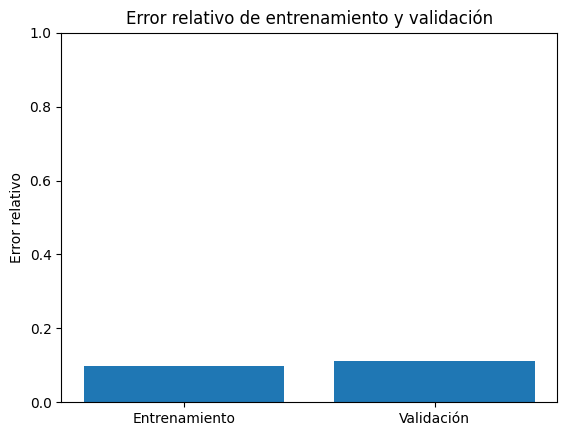

Error de entrenamiento: 0.09938953526140087
Error de validacion:  0.11035796179677808
Diferencia de train - validacion :   0.010968426535377204


In [ ]:


# Calcular los errores relativos de entrenamiento y validación
relative_train_error = abs(train_error2b - test_error2b) / train_error2b
relative_test_error = abs(train_error2b - test_error2b) / test_error2b

# Graficar los errores relativos
plt.bar(['Entrenamiento', 'Validación'], [relative_train_error, relative_test_error])
plt.title('Error relativo de entrenamiento y validación')
plt.ylabel('Error relativo')
plt.ylim(0, 1)
plt.show()
print(f'Error de entrenamiento: {relative_train_error}' )
print(f'Error de validacion:  {relative_test_error}')
print(f'Diferencia de train - validacion :   {relative_test_error - relative_train_error}')

La **principal diferencia entre la regresión Ridge y Lasso** es que la regresión Ridge utiliza la suma de los cuadrados de los coeficientes de la regresión como término de penalización, mientras que la regresión Lasso utiliza la suma de los valores absolutos de los coeficientes de la regresión como término de penalización. Esto significa que la regresión Lasso tiende a generar modelos dispersos, donde algunos coeficientes son exactamente iguales a cero, mientras que la regresión Ridge no establece coeficientes exactamente iguales a cero, aunque pueden ser muy pequeños.

# Metodo 3

In [ ]:
# Método 3: Cálculo del gradiente descendente
# Normalizar los datos para acelerar la convergencia
X_norm = (X - np.mean(X, axis=0))
X2 = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))
#Definir los parámetros del algoritmo de gradiente descendente
alpha = 0.01
iters = 1000
theta2 = np.zeros(X2.shape[1])
#Realizar el algoritmo de gradiente descendente
for i in range(iters):
  h = X2 @ theta2
  gradient = X2.T @ (h - y) / y.size
  theta2 -= alpha * gradient
#Realizar la predicción
y_pred3 = X2 @ theta2

In [ ]:
#Calcular los errores de entrenamiento y validación
train_error3 = mean_squared_error(y, y_pred3)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)
X_train2 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test2 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_train_pred3 = X_train2 @ theta2
y_test_pred3 = X_test2 @ theta2
test_error3 = mean_squared_error(y_test, y_test_pred3)

In [ ]:
print("Método 3: Cálculo del gradiente descendente")
print("Parámetros de regresión: ", theta2)
print("Coeficiente de regresión: ", pearsonr(y, y_pred3)[0])
print("R2_score (entrenamiento): ", r2_score(y, y_pred3))
print("MSE (entrenamiento): ", train_error3)
print("RMSE (entrenamiento): ", np.sqrt(train_error3))
print("MSE (validación): ", test_error3)
print("RMSE (validación): ", np.sqrt(test_error3))

Método 3: Cálculo del gradiente descendente
Parámetros de regresión:  [ 0.52718174  0.02240574 -0.06447965  0.0516288   0.00199775 -0.01531111
 -0.007679   -0.02944978 -0.03420712 -0.00737646  0.03576475  0.10571733]
Coeficiente de regresión:  0.5595003591390224
R2_score (entrenamiento):  0.1725480494406485
MSE (entrenamiento):  0.021572021199225383
RMSE (entrenamiento):  0.1468741679098996
MSE (validación):  0.018999821451216557
RMSE (validación):  0.13783983985487128


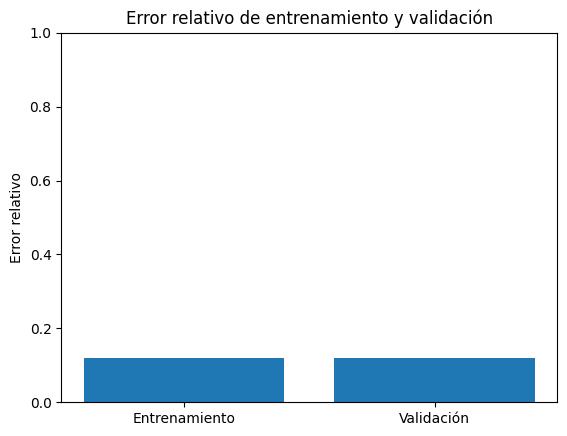

Error de entrenamiento: 0.11923777212406918
Error de validacion:  0.11923777212406918
Diferencia de train - validacion :   0.0


In [ ]:
# Calcular los errores relativos de entrenamiento y validación
relative_train_error_3 = abs(train_error3- test_error3 ) / train_error3
relative_test_error_3 = abs(train_error3 - test_error3 ) / train_error3

# Graficar los errores relativos
plt.bar(['Entrenamiento', 'Validación'], [relative_train_error_3 , relative_test_error_3])
plt.title('Error relativo de entrenamiento y validación')
plt.ylabel('Error relativo')
plt.ylim(0, 1)
plt.show()
print(f'Error de entrenamiento: {relative_train_error_3 }' )
print(f'Error de validacion:  {relative_test_error_3}')
print(f'Diferencia de train - validacion :   {relative_test_error_3 - relative_train_error_3 }')

#Preguntas

Responder las siguientes preguntas:
1. ¿Es posible que se presente el fenómeno de sobreajuste (overfitting) en la regresión 
lineal? ¿Se presento el fenómeno de sobreajuste en el modelo entrenado?
2. ¿El data set seleccionado presenta valores atípicos (outliers)? ¿Cómo se 
identificaron los valores atípicos?
3. ¿Es necesario eliminar los valores atípicos (outliers)? ¿Por qué sí o por qué no?
4. ¿Qué es el escalado (Normalization)? ¿Cuándo es necesario?
5. ¿En qué escenario es preferible utilizar el Descenso del Gradiente en lugar de la Regresión Ordinaria por Mínimos Cuadrados (Ecuación Normal) y por qué?

#Solución


1. Claro que es posible que se presente el fenómeno de sobreajuste en la regresión lineal. El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y pierde su capacidad de generalización a datos nuevos. En el caso de la regresión lineal, el modelo podría ajustarse demasiado a los datos de entrenamiento, lo que significa que la línea de regresión podría pasar muy cerca de cada punto de datos individual, en lugar de capturar la tendencia general de los datos.

  El sobreajuste puede ocurrir en la regresión lineal si se utilizan demasiados predictores o variables independientes en el modelo en relación al número de observaciones de datos disponibles. También puede ocurrir si se utilizan técnicas de regularización insuficientes para evitar el ajuste excesivo, o si se utilizan conjuntos de datos de entrenamiento demasiado pequeños.

 -----
  En el metodo 1 no existe overfitting debido a la diferencia del error de entrenamiento con error de validacion es 0 .

  En el metodo 2a no existe overfitting debido a la diferencia del error de entrenamiento con error de validacion es 0.023 .

 En el método 2b Ridge no existe overfittig, ya que la diferencia de error de entrenamiento con el error de validación no es considerablemente grande. Debido a que su diferencia es de "0.010968426535377204", podemos afirmar que el modelo parece generalizar bien a los datos de validación y que no hay evidencia clara de overfitting.

 En el metodo 3 no existe overfitting debido a la diferencia del error de entrenamiento con error de validacion es 0 .

2. No presenta valores atipicos debido a que sus valores estan bien distribuidos en sus parámetros. Esto se puede comprobar en los histogramas que muestran la distribución de los valores para cada una de las variables del dataset.

3. Depende del contexto y del análisis que se quiera realizar. En algunos casos, los valores atípicos pueden ser verdaderos datos atípicos o excepciones que no representan el comportamiento general del conjunto de datos, y en estos casos, su eliminación podría ser justificada. Por ejemplo, en la detección de fraudes financieros, puede ser importante eliminar los valores atípicos que podrían indicar transacciones sospechosas.

 Por otro lado, en algunos casos, los valores atípicos pueden ser datos legítimos y relevantes para el análisis. Por ejemplo, en el análisis de precios de bienes raíces, es posible que existan propiedades que se vendan a precios mucho más altos o bajos que el promedio debido a características únicas o situaciones específicas, y estos valores atípicos podrían ser relevantes para la estimación del precio de otras propiedades.

 En resumen, la eliminación de valores atípicos depende del contexto y de la naturaleza del análisis que se quiera realizar, y debe ser justificada en función de los objetivos y las hipótesis del estudio

4. El escalado, también conocido como normalización, es un proceso de transformación de los datos para que se ajusten a una escala común. En el contexto del aprendizaje automático, el escalado se utiliza para asegurarse de que las variables independientes (características) tengan un rango similar.

 El escalado es necesario cuando las variables independientes tienen diferentes escalas y unidades de medida. Por ejemplo, si una variable mide en miles de dólares y otra en porcentajes, es probable que tengan diferentes escalas y, por lo tanto, afecten la regresión de manera desproporcionada. El escalado también puede mejorar la eficacia y la eficiencia de algunos algoritmos de aprendizaje automático, como la regresión logística y el k-means.

 El escalado no siempre es necesario, ya que depende de los datos y el algoritmo que se esté utilizando. En algunos casos, las variables pueden tener escalas similares y no requerir escalado. En otros casos, el algoritmo utilizado puede estar diseñado para manejar variables con diferentes escalas. Es importante tener en cuenta que el escalado debe realizarse en los datos de entrenamiento y, posteriormente, aplicarse al conjunto de datos de prueba para evitar la contaminación de información del conjunto de prueba.

5. El Descenso del Gradiente y la Regresión Ordinaria por Mínimos Cuadrados son dos técnicas muy populares para resolver problemas de regresión. Ambas técnicas buscan encontrar los parámetros óptimos para ajustar una línea o una curva a un conjunto de datos.
La Regresión Ordinaria por Mínimos Cuadrados utiliza la Ecuación Normal para encontrar los valores óptimos de los parámetros. Esta técnica es muy eficiente cuando se trata de conjuntos de datos pequeños, ya que el cálculo de los parámetros es una operación directa que se puede realizar en una sola operación matricial. Sin embargo, cuando el conjunto de datos es grande, el cálculo de la inversa de la matriz puede ser computacionalmente costoso y requerir mucha memoria.
Por otro lado, el Descenso del Gradiente es un algoritmo iterativo que ajusta los parámetros en cada iteración para minimizar la función de costo. Esta técnica es muy eficiente en grandes conjuntos de datos, ya que los cálculos se realizan de forma incremental y la memoria necesaria es muy baja. Además, el Descenso del Gradiente se puede utilizar para optimizar cualquier función de costo, lo que lo hace muy versátil.
En general, es preferible utilizar el Descenso del Gradiente cuando se trabaja con grandes conjuntos de datos y/o cuando la función de costo no es convexa (es decir, tiene múltiples mínimos locales). La Regresión Ordinaria por Mínimos Cuadrados es preferible cuando se trabaja con conjuntos de datos pequeños y la función de costo es convexa. Se puede concluir que ambas técnicas son útiles y efectivas para resolver problemas de regresión, y la elección entre ellas dependerá del tamaño del conjunto de datos y la complejidad de la función de costo.